## 왜도와 첨도 구하기
-  주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
- 데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/_ft7ZlDlk7c

### 왜도
비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 **실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표**이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

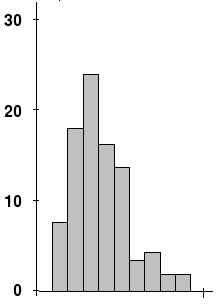

**위키백과 https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84

### 첨도
**확률분포의 꼬리가 두꺼운 정도**를 나타내는 척도이다. 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타낸다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 산포는 정규분포보다 꼬리가 얇은 분포로 생각할 수 있다, 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 꼬리가 두꺼운 분포로 판단할 수 있다.

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

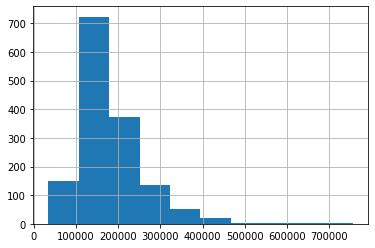

In [2]:
df['SalePrice'].hist()

In [3]:
# 'SalePrice'컬럼 왜도와 첨도계산 
sk1 = df['SalePrice'].skew()
ku1 = df['SalePrice'].kurt()

print("왜도 : ", sk1, "첨도 : ", ku1)

왜도 :  1.8828757597682129 첨도 :  6.536281860064529


In [4]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice']) # ln(x)
#df['SalePrice'] = np.log(df['SalePrice']) # ln(1+x) : 작은 값에 대하여 더 높은 정확도 제공

<AxesSubplot:>

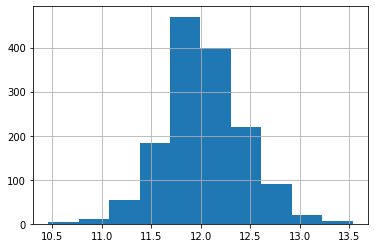

In [5]:
df['SalePrice'].hist()

In [6]:
# 'SalePrice'컬럼 왜도와 첨도계산 
sk2 = df['SalePrice'].skew()
ku2 = df['SalePrice'].kurt()

print("왜도 : ", sk2, "첨도 : ", ku2)

왜도 :  0.12134661989685333 첨도 :  0.809519155707878


In [7]:
# 모두 더한 다음 출력
print(sk1+sk2+ku1+ku2)
print(round(sk1+sk2+ku1+ku2,2))

9.350023395437473
9.35


## Hint
- DataFrame.skew() 왜도
- DataFrame.kurt() 첨도

## 풀이

In [8]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [9]:
# 데이터 불러오기
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:>

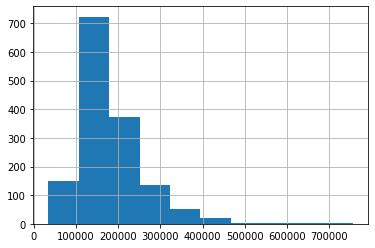

In [10]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [11]:
# 'SalePrice'컬럼 왜도와 첨도계산
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [12]:
# 'SalePrice'컬럼 로그변환
df['SalePrice'] = np.log1p(df['SalePrice'])

<AxesSubplot:>

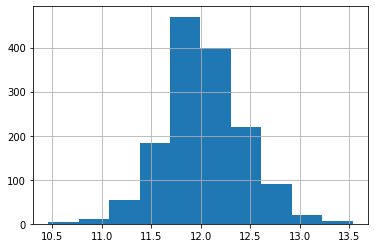

In [13]:
# EDA (시험에서는 시각화 불가)
df['SalePrice'].hist()

In [14]:
# 'SalePrice'컬럼 왜도와 첨도계산
s2 = df['SalePrice'].skew()
k2 = df['SalePrice'].kurt()
print("왜도:" ,s2)
print("첨도:" ,k2)

왜도: 0.12134661989685333
첨도: 0.809519155707878


In [15]:
# 모두 더한 다음 출력
print(round(s1+s2+k1+k2,2))

9.35
